In [57]:
import numpy as np
import matplotlib.pyplot as plt

from imogen import parabolic, profile, ocean_co2, data_info


%matplotlib inline
plt.rcParams['figure.figsize']=(12,5)


In [48]:
SCENARIO_DIR='/prj/CLIFFTOP/COMMON_DATA/SCENARIOS/'
SSP_file=SCENARIO_DIR+'SSP2-2.6_IMAGE_Tprofile_raw.txt'

prj1_file=SCENARIO_DIR+'2deg_global_temp_anomaly.dat'
prj1_label='2deg'
prj2_file=SCENARIO_DIR+'1p5deg_global_temp_anomaly_vn1p1.dat'
prj2_label='1p5deg'
prj3_file=SCENARIO_DIR+'1p81p5deg_global_temp_anomaly.dat'
prj3_label='1p81p5deg'

OUTFILE='/users/eow/edwcom/CLIFFTOP/IMOGEN/scenarios/SSP2-2.6_IMAGE_Tprofile.txt'


In [49]:
inf=open(SSP_file,'r')
lines=inf.readlines()
SSP_years=[]
SSP_T=[]
for line in lines:
    split=line.split()
    SSP_years.append(float(split[0]))
    SSP_T.append(float(split[1]))
inf.close()

In [50]:
inf=open(prj1_file,'r')
lines=inf.readlines()
prj1_years=[]
prj1_T=[]
for line in lines:
    split=line.split()
    prj1_years.append(float(split[0]))
    prj1_T.append(float(split[1]))
inf.close()

prj1_years=prj1_years[:prj1_years.index(2100)+1]
prj1_T=prj1_T[:prj1_years.index(2100)+1]

In [51]:
inf=open(prj2_file,'r')
lines=inf.readlines()
prj2_years=[]
prj2_T=[]
for line in lines:
    split=line.split()
    prj2_years.append(float(split[0]))
    prj2_T.append(float(split[1]))
inf.close()

prj2_years=prj2_years[:prj2_years.index(2100)+1]
prj2_T=prj2_T[:prj2_years.index(2100)+1]

In [52]:
inf=open(prj3_file,'r')
lines=inf.readlines()
prj3_years=[]
prj3_T=[]
for line in lines:
    split=line.split()
    prj3_years.append(float(split[0]))
    prj3_T.append(float(split[1]))
inf.close()

prj3_years=prj3_years[:prj3_years.index(2100)+1]
prj3_T=prj3_T[:prj3_years.index(2100)+1]

In [94]:
# Also normalise the curves so that they end up at the current temperature and gradient estimate
beta=0.025                # K/yr
dt_now=1.12
yr_now=2015
start_year=1850
end_year=2100

n_yr=end_year-start_year+1
mod_years=np.arange(start_year,end_year+1)
now_index=np.where(mod_years==yr_now)[0][0]

dt_limit=2.
mu_zero = 0.07
mu_one = 0.000
mod1_T = profile.profile(beta, dt_now, dt_limit, mu_zero, mu_one)
mod1_T = mod1_T[:n_yr]

dt_limit=1.5
mu_zero = 0.18
mu_one = 0.000
mod2_T = profile.profile(beta, dt_now, dt_limit, mu_zero, mu_one)
mod2_T = mod2_T[:n_yr]

dt_limit=1.5
mu_zero = 0.005
mu_one = 0.00015
mod3_T = profile.profile(beta, dt_now, dt_limit, mu_zero, mu_one)
mod3_T = mod3_T[:n_yr]



(1900, 2100)

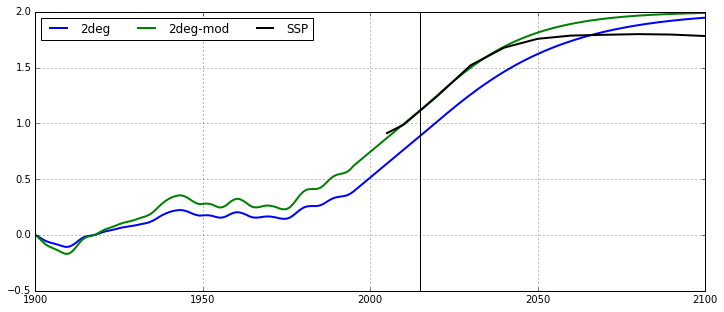

In [95]:
plt.plot(prj1_years,prj1_T,label=prj1_label,lw='2')
#plt.plot(prj2_years,prj2_T,label=prj2_label,lw='2')
#plt.plot(prj3_years,prj3_T,label=prj3_label,lw='2')
plt.plot(mod_years,mod1_T,label=prj1_label+'-mod',lw='2')
#plt.plot(mod_years,mod2_T,label=prj2_label+'-mod',lw='2')
#plt.plot(mod_years,mod3_T,label=prj3_label+'-mod',lw='2')
plt.plot(SSP_years,SSP_T,label='SSP',lw='2',c='k')
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.grid(True)
plt.legend(loc='upper left',ncol=7)
plt.xlim([1900,2100])


In [6]:
RCP_RF=np.array(RCP_RF)
RCP_years=np.array(RCP_years)
SSP_RF=np.array(SSP_RF)
SSP_years=np.array(SSP_years)


OUT_RF=np.copy(RCP_RF)
OUT_years=np.copy(RCP_years)


In [7]:
print(OUT_years)

[ 1850.  1851.  1852.  1853.  1854.  1855.  1856.  1857.  1858.  1859.
  1860.  1861.  1862.  1863.  1864.  1865.  1866.  1867.  1868.  1869.
  1870.  1871.  1872.  1873.  1874.  1875.  1876.  1877.  1878.  1879.
  1880.  1881.  1882.  1883.  1884.  1885.  1886.  1887.  1888.  1889.
  1890.  1891.  1892.  1893.  1894.  1895.  1896.  1897.  1898.  1899.
  1900.  1901.  1902.  1903.  1904.  1905.  1906.  1907.  1908.  1909.
  1910.  1911.  1912.  1913.  1914.  1915.  1916.  1917.  1918.  1919.
  1920.  1921.  1922.  1923.  1924.  1925.  1926.  1927.  1928.  1929.
  1930.  1931.  1932.  1933.  1934.  1935.  1936.  1937.  1938.  1939.
  1940.  1941.  1942.  1943.  1944.  1945.  1946.  1947.  1948.  1949.
  1950.  1951.  1952.  1953.  1954.  1955.  1956.  1957.  1958.  1959.
  1960.  1961.  1962.  1963.  1964.  1965.  1966.  1967.  1968.  1969.
  1970.  1971.  1972.  1973.  1974.  1975.  1976.  1977.  1978.  1979.
  1980.  1981.  1982.  1983.  1984.  1985.  1986.  1987.  1988.  1989.
  1990

In [8]:
SSP_interpolate_years=np.arange(2005,2101)

In [9]:
SSP_interpolate_RF=np.interp(SSP_interpolate_years,SSP_years,SSP_RF)



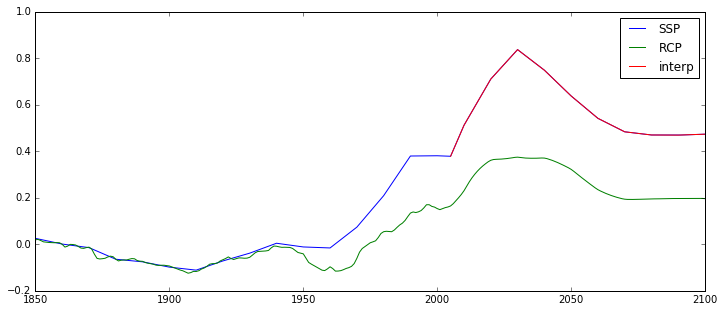

In [13]:
plt.plot(SSP_years,SSP_RF,label='SSP')
plt.plot(RCP_years,RCP_RF,label='RCP')
plt.plot(SSP_interpolate_years,SSP_interpolate_RF,label='interp')
plt.legend()

In [14]:
index_pt=np.where(OUT_years==SSP_interpolate_years[0])[0][0]
print(index_pt)
print(OUT_years[index_pt:])
print(SSP_interpolate_years)

155
[ 2005.  2006.  2007.  2008.  2009.  2010.  2011.  2012.  2013.  2014.
  2015.  2016.  2017.  2018.  2019.  2020.  2021.  2022.  2023.  2024.
  2025.  2026.  2027.  2028.  2029.  2030.  2031.  2032.  2033.  2034.
  2035.  2036.  2037.  2038.  2039.  2040.  2041.  2042.  2043.  2044.
  2045.  2046.  2047.  2048.  2049.  2050.  2051.  2052.  2053.  2054.
  2055.  2056.  2057.  2058.  2059.  2060.  2061.  2062.  2063.  2064.
  2065.  2066.  2067.  2068.  2069.  2070.  2071.  2072.  2073.  2074.
  2075.  2076.  2077.  2078.  2079.  2080.  2081.  2082.  2083.  2084.
  2085.  2086.  2087.  2088.  2089.  2090.  2091.  2092.  2093.  2094.
  2095.  2096.  2097.  2098.  2099.  2100.]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034
 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049
 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064
 2065 206

In [15]:
OUT_RF[index_pt:]=SSP_interpolate_RF


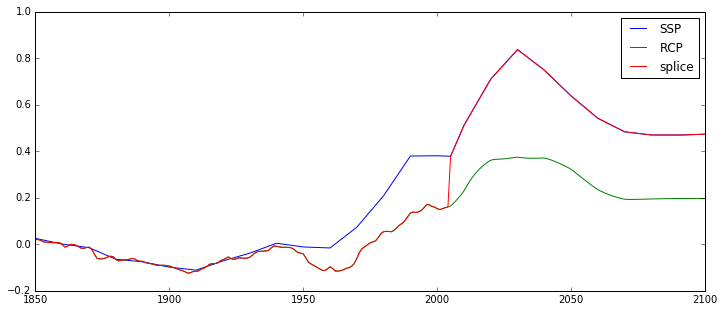

In [16]:
plt.plot(SSP_years,SSP_RF,label='SSP')
plt.plot(RCP_years,RCP_RF,label='RCP')
plt.plot(OUT_years,OUT_RF,label='splice')
plt.legend()

In [30]:
outf=open(SSP_file,'w')

for year,RF in zip(OUT_years,OUT_RF):
    line= '%4i  %8.4f\n' % (year,RF)
    outf.write(line)

    
outf.close()

In [31]:
OUT_RF_smooth=np.copy(OUT_RF)
mean_range=1
n_smooths=10

for j in range(n_smooths):
    for i in range(index_pt-2,len(OUT_RF_smooth)):
        if i<mean_range:
            OUT_RF_smooth[i]=np.mean(OUT_RF_smooth[:i+mean_range+1])
        elif (i>len(OUT_RF_smooth)-mean_range):
            OUT_RF_smooth[i]=np.mean(OUT_RF_smooth[i-mean_range:])
        else:
            OUT_RF_smooth[i]=np.mean(OUT_RF_smooth[i-mean_range:i+mean_range+1])
            #print(i)
            #print(i-mean_range,i+mean_range+1)






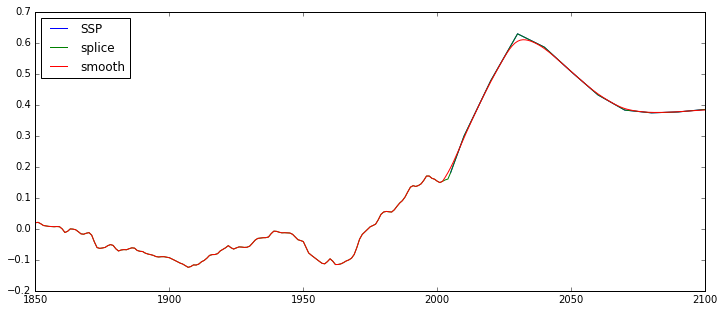

In [32]:
plt.plot(SSP_years,SSP_RF,label='SSP')
plt.plot(OUT_years,OUT_RF,label='splice')
plt.plot(OUT_years,OUT_RF_smooth,label='smooth')
plt.legend(loc=2)

In [33]:
outf=open(OUTFILE,'w')

for year,RF in zip(OUT_years,OUT_RF_smooth):
    line= '%4i  %8.4f\n' % (year,RF)
    outf.write(line)

    
outf.close()

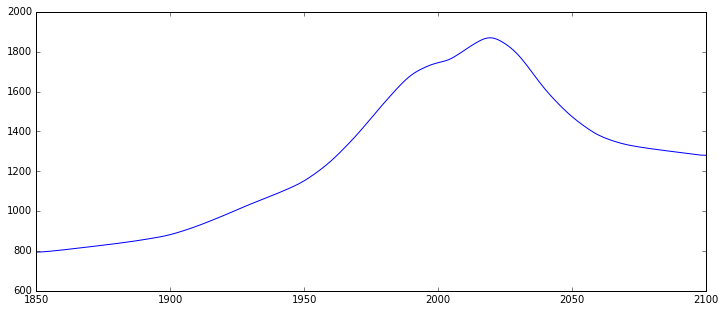

In [34]:
# Now splice the rcp and SSP concentration files
SSP_co2_conc_file=SCENARIO_DIR+'SSP2-2.6_IMAGE_concs_co2_smooth.txt'
SSP_ch4n2o_conc_file=SCENARIO_DIR+'SSP2-2.6_IMAGE_concs_ch4_n2o_smooth.txt'

lines=open(SSP_ch4n2o_conc_file,'r').readlines()
year,ch4,n2o=[],[],[]
for line in lines:
    split=line.replace('\n','').split()
    year.append(int(split[0]))
    ch4.append(float(split[1]))
    n2o.append(float(split[2]))

plt.plot(year,ch4)


